<a href="https://colab.research.google.com/github/rajput-t/ml_algorithms/blob/main/Titanic_classification_model_and_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

This notebook demonstrates a typical machine learning workflow for predicting survival on the Titanic. It showcases key concepts in data preprocessing, feature engineering, and model training using a classification algorithm.

The steps covered include:
- Handling missing values
- Feature engineering
- Encoding categorical features
- Training a classification model (Random Forest)
- Evaluating model performance
- Visualizing feature importances

In [25]:
import seaborn as sns
import pandas as pd

# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Preprocessing and Handling Missing Values

Before training a model, it's crucial to clean and prepare the data. This involves addressing missing values and transforming features into a suitable format.

In this notebook, we perform the following preprocessing steps:

- **Dropping columns with excessive missing values:** The 'deck' column is removed due to a large number of missing entries.
- **Imputing missing values:** Missing values in the 'age' column are filled with the median age, and missing values in the 'embarked' column are filled with the most frequent value (mode).

In [26]:
# Dropping column 'deck' (too many missing)
df.drop(columns=['deck'], inplace=True)

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## Feature Engineering

Feature engineering involves creating new features from existing ones to improve model performance.

Here, we create a new feature:

- **Family Size:** Combining 'sibsp' (number of siblings/spouses) and 'parch' (number of parents/children) to represent the total number of family members aboard.

## Encoding Categorical Features

Machine learning models typically require numerical input. Categorical features need to be converted into numerical representations.

We use the following encoding techniques:

- **Mapping:** The 'sex' column is mapped to numerical values (0 for male, 1 for female).
- **One-Hot Encoding:** The 'embarked' and 'class' columns are one-hot encoded to create binary columns for each category. `drop_first=True` is used to avoid multicollinearity.

In [27]:
# Encode 'sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# One-hot encoding
df = pd.get_dummies(df, columns=['embarked', 'class'], drop_first=True)

# Family size
df['family_size'] = df['sibsp'] + df['parch']

# Drop irrelevant columns
df.drop(columns=['who', 'adult_male', 'alive', 'embark_town', 'alone'], inplace=True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,class_Second,class_Third,family_size
0,0,3,0,22.0,1,0,7.2500,False,True,False,True,1
1,1,1,1,38.0,1,0,71.2833,False,False,False,False,1
2,1,3,1,26.0,0,0,7.9250,False,True,False,True,0
3,1,1,1,35.0,1,0,53.1000,False,True,False,False,1
4,0,3,0,35.0,0,0,8.0500,False,True,False,True,0


## Classification Model Training and Evaluation

We use a Random Forest Classifier to predict survival. Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.

- **Splitting Data:** The data is split into training and testing sets to evaluate the model's performance on unseen data.
- **Training:** The Random Forest model is trained on the training data.
- **Prediction and Evaluation:** The trained model is used to predict survival on the test set, and its performance is evaluated using metrics like accuracy and a classification report (precision, recall, f1-score).

## Cross-Validation

Cross-validation is a technique used to evaluate the performance of a machine learning model on unseen data and to prevent overfitting. It involves splitting the data into multiple folds and training and testing the model on different combinations of these folds.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
features = ['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch', 'family_size',
            'embarked_Q', 'embarked_S', 'class_Second', 'class_Third']
X = df[features]
y = df['survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# from sklearn.model_selection import cross_val_score, KFold
# # Perform cross-validation
# cv = KFold(n_splits=4)
# cv_scores = cross_val_score(model, X_train, y_train, cv=cv) # Using 5 folds for cross-validation

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       119
           1       0.71      0.73      0.72        60

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



## Feature Importance

Understanding which features contribute most to the model's predictions can provide valuable insights.

- **Feature Importances:** The Random Forest model provides a measure of the importance of each feature.
- **Visualization:** A bar plot is generated to visualize the feature importances, showing which features had the most significant impact on the survival prediction.

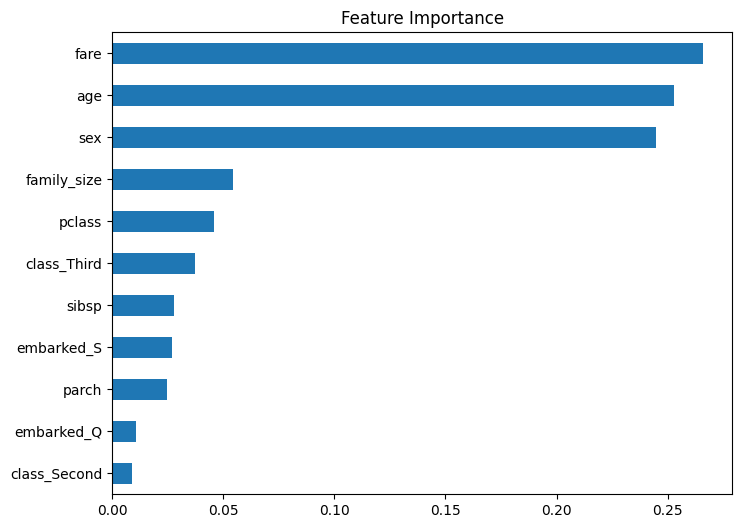

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.show()

## Insights from Feature Importance

Based on the feature importance plot, we can see that `fare`, `age`, and `sex` are the most important features in predicting survival. This indicates that these factors had the most significant influence on the survival outcomes in the Titanic dataset according to the trained Random Forest model.